In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hopsworks
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Read from .env
HOPSWORKS_API_KEY = os.getenv("aqi_forecast_api_key")

if not HOPSWORKS_API_KEY:
    raise ValueError("API key not found. Check .env file.")

# Connect to Hopsworks
project = hopsworks.login(api_key_value=HOPSWORKS_API_KEY)

# Fetch and read feature group
fs = project.get_feature_store()
fg = fs.get_feature_group("aqi_features", 1)
df = fg.read()

df.tail(3)


2025-10-30 19:42:53,854 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-10-30 19:42:53,876 INFO: Initializing external client
2025-10-30 19:42:53,876 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-10-30 19:42:56,101 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1251493
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.31s) 


,timestamp_utc,ow_temp,ow_pressure,ow_humidity,ow_wind_speed,ow_wind_deg,ow_clouds,ow_co,ow_no2,ow_pm2_5,ow_pm10,aqi_aqicn,hour,day,month,weekday,lag_1,lag_2,rolling_mean_3
97,2025-10-30 14:11:56.059681+00:00,31.07,1008.0,27.0,2.57,30.0,7.0,3.3,6.8,59.0,36.0,59.0,14,30,10,3,60.0,60.0,59.666667
98,2025-10-30 14:25:20.853540+00:00,31.06,1008.0,27.0,2.57,30.0,7.0,3.3,6.8,59.0,36.0,59.0,14,30,10,3,59.0,60.0,59.333333
99,2025-10-30 14:39:10.821524+00:00,30.07,1009.0,26.0,2.57,30.0,30.0,2.9,7.8,47.0,31.0,47.0,14,30,10,3,59.0,59.0,55.000000


In [16]:
#data overview
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype                  
---  ------          --------------  -----                  
 0   timestamp_utc   100 non-null    datetime64[us, Etc/UTC]
 1   ow_temp         100 non-null    float64                
 2   ow_pressure     100 non-null    float64                
 3   ow_humidity     100 non-null    float64                
 4   ow_wind_speed   100 non-null    float64                
 5   ow_wind_deg     100 non-null    float64                
 6   ow_clouds       100 non-null    float64                
 7   ow_co           100 non-null    float64                
 8   ow_no2          100 non-null    float64                
 9   ow_pm2_5        100 non-null    float64                
 10  ow_pm10         100 non-null    float64                
 11  aqi_aqicn       100 non-null    float64                
 12  hour            100 non-null    int64

timestamp_utc     0
ow_temp           0
ow_pressure       0
ow_humidity       0
ow_wind_speed     0
ow_wind_deg       0
ow_clouds         0
ow_co             0
ow_no2            0
ow_pm2_5          0
ow_pm10           0
aqi_aqicn         0
hour              0
day               0
month             0
weekday           0
lag_1             0
lag_2             0
rolling_mean_3    0
dtype: int64

In [17]:
#sort dataset
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], utc=True)
df = df.sort_values("timestamp_utc").reset_index(drop=True)


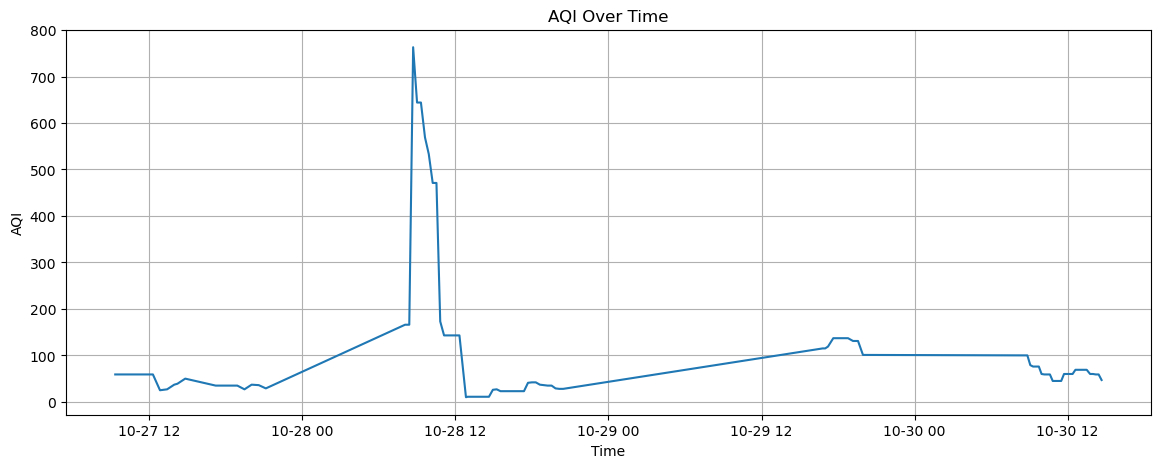

In [18]:
#time series plot
plt.figure(figsize=(14, 5))
plt.plot(df["timestamp_utc"], df["aqi_aqicn"])
plt.title("AQI Over Time")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


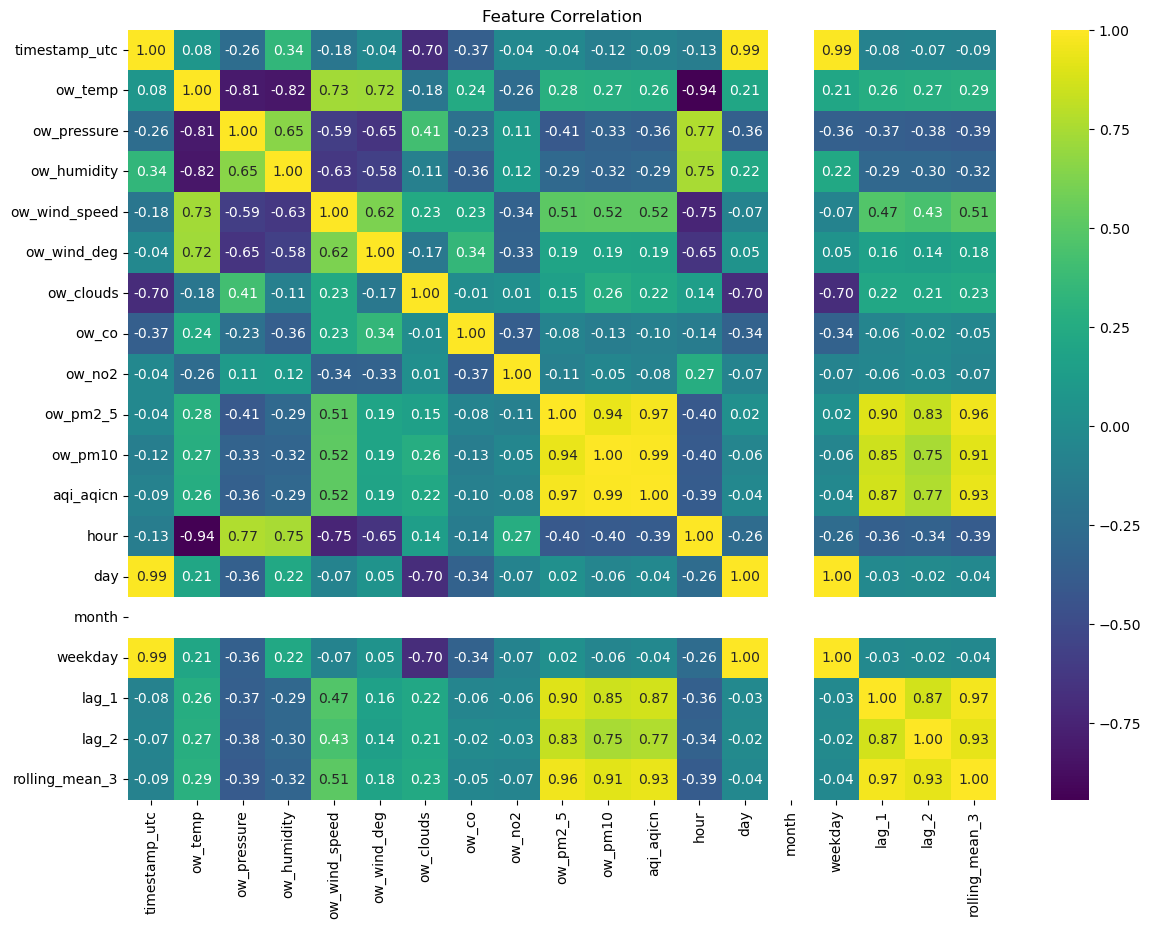

In [19]:
##correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="viridis")
plt.title("Feature Correlation")
plt.show()


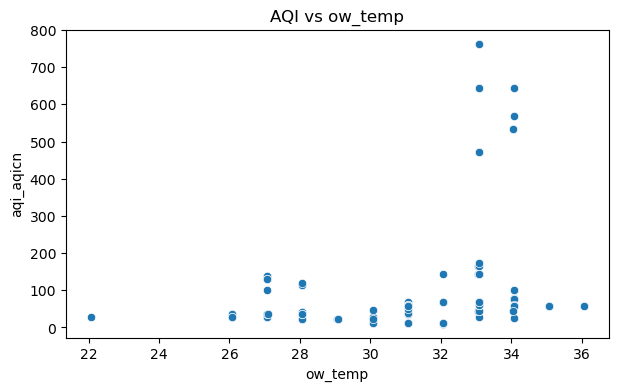

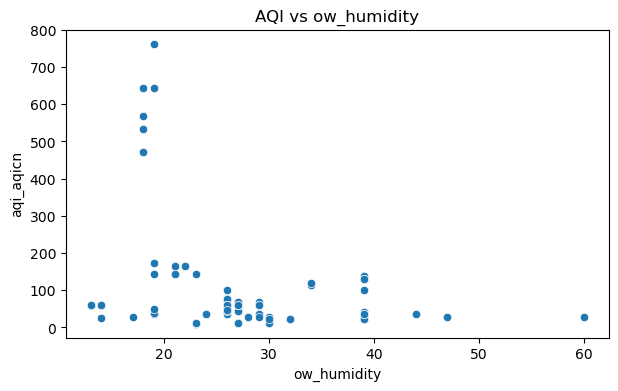

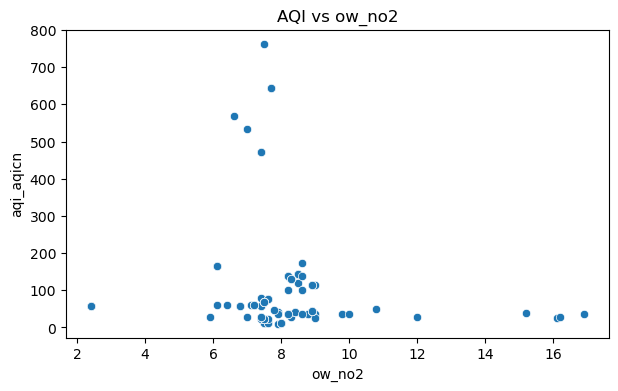

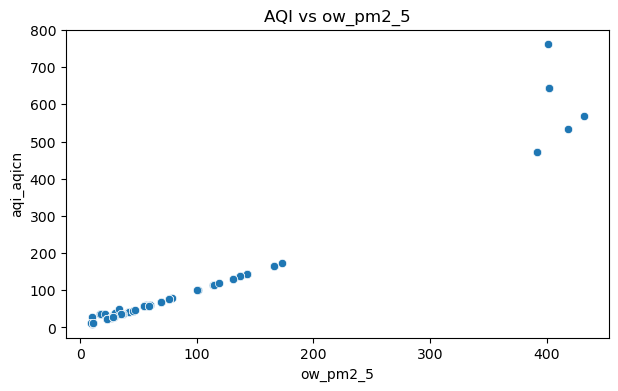

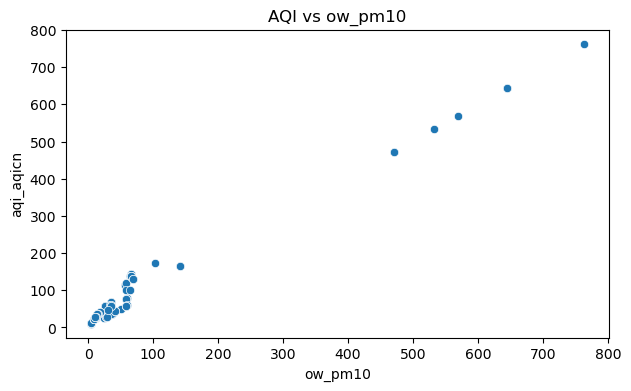

In [20]:
#weather vs aqi relations
features = ["ow_temp", "ow_humidity", "ow_no2", "ow_pm2_5", "ow_pm10"]

for col in features:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y="aqi_aqicn")
    plt.title(f"AQI vs {col}")
    plt.show()


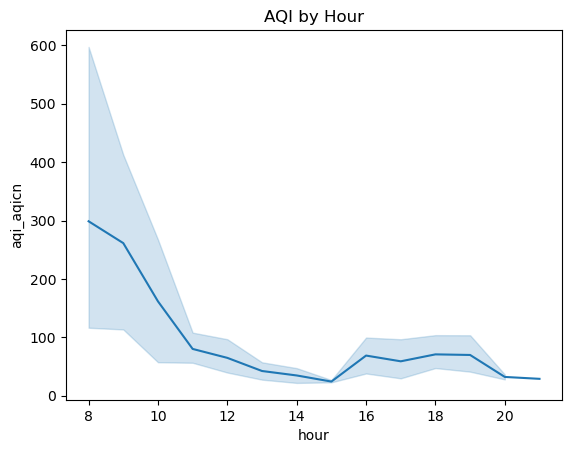

2025-10-30 19:43:04,499 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-30 19:43:04,508 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


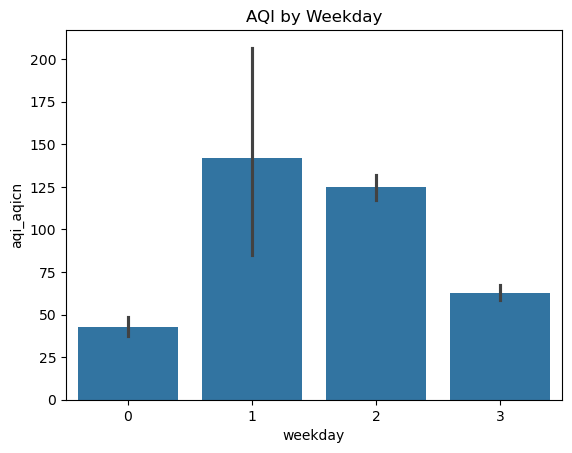

In [21]:
#seasonal patterns
sns.lineplot(data=df, x="hour", y="aqi_aqicn")
plt.title("AQI by Hour")
plt.show()

sns.barplot(data=df, x="weekday", y="aqi_aqicn")
plt.title("AQI by Weekday")
plt.show()
